In [1]:
%matplotlib inline
#from matplotlib import style
#style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy.sql.expression import func

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
session.query(Measurement.date, Measurement.id).all()

[('2010-01-01', 1),
 ('2010-01-02', 2),
 ('2010-01-03', 3),
 ('2010-01-04', 4),
 ('2010-01-06', 5),
 ('2010-01-07', 6),
 ('2010-01-08', 7),
 ('2010-01-09', 8),
 ('2010-01-10', 9),
 ('2010-01-11', 10),
 ('2010-01-12', 11),
 ('2010-01-14', 12),
 ('2010-01-15', 13),
 ('2010-01-16', 14),
 ('2010-01-17', 15),
 ('2010-01-18', 16),
 ('2010-01-19', 17),
 ('2010-01-20', 18),
 ('2010-01-21', 19),
 ('2010-01-22', 20),
 ('2010-01-23', 21),
 ('2010-01-24', 22),
 ('2010-01-25', 23),
 ('2010-01-26', 24),
 ('2010-01-27', 25),
 ('2010-01-28', 26),
 ('2010-01-30', 27),
 ('2010-01-31', 28),
 ('2010-02-01', 29),
 ('2010-02-03', 30),
 ('2010-02-04', 31),
 ('2010-02-05', 32),
 ('2010-02-06', 33),
 ('2010-02-07', 34),
 ('2010-02-08', 35),
 ('2010-02-09', 36),
 ('2010-02-11', 37),
 ('2010-02-12', 38),
 ('2010-02-13', 39),
 ('2010-02-14', 40),
 ('2010-02-15', 41),
 ('2010-02-16', 42),
 ('2010-02-17', 43),
 ('2010-02-19', 44),
 ('2010-02-20', 45),
 ('2010-02-21', 46),
 ('2010-02-22', 47),
 ('2010-02-23', 48),
 

In [11]:
session.query(func.max(Measurement.date)).first()

('2017-08-23')

In [12]:
results = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date > '2016-08-23').all()

In [13]:
func = lambda x:  dt.datetime.strptime(x, '%Y-%m-%d')
func('2017-08-23')

datetime.datetime(2017, 8, 23, 0, 0)

In [14]:
results_df = pd.DataFrame(results)
results_df['date'] = results_df['date'].apply(lambda x:  dt.datetime.strptime(x, '%Y-%m-%d').date())
results_df

,prcp,date
0,0.08,2016-08-24
1,0.08,2016-08-25
2,0.00,2016-08-26
3,0.00,2016-08-27
4,0.01,2016-08-28
5,0.00,2016-08-29
6,0.00,2016-08-30
7,0.13,2016-08-31
8,0.00,2016-09-01
9,0.00,2016-09-02


In [15]:
results_df.loc[0,"date"]

datetime.date(2016, 8, 24)

In [16]:

datetime_object = dt.datetime.strptime('2016-08-24', '%Y-%m-%d')

In [17]:
datetime_object.date()


datetime.date(2016, 8, 24)

In [18]:
gb_results = results_df.groupby("date").sum()
gb_results.head()

,prcp
date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10


gb_results.sort_values("date")

[]

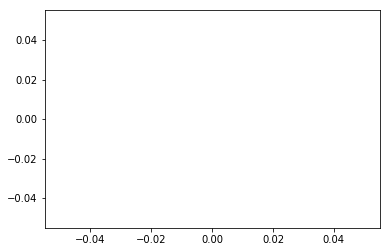

In [19]:
plt.plot(x=results_df.index,y=results_df["prcp"])

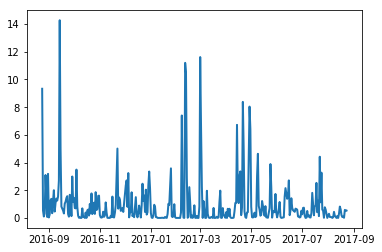

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
import matplotlib.pyplot as plt
x, y = gb_results.index, gb_results["prcp"]
plt.plot(x,y, lw=2)

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [23]:
# Design a query to show how many stations are available in this dataset?


In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

AttributeError: 'function' object has no attribute 'min'

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
